In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
x_train = pd.read_csv("data/processed/x_train.csv")
y_train = pd.read_csv("data/processed/y_train.csv")

In [17]:
df = x_train.copy()
df['default_payment_next_month'] = y_train

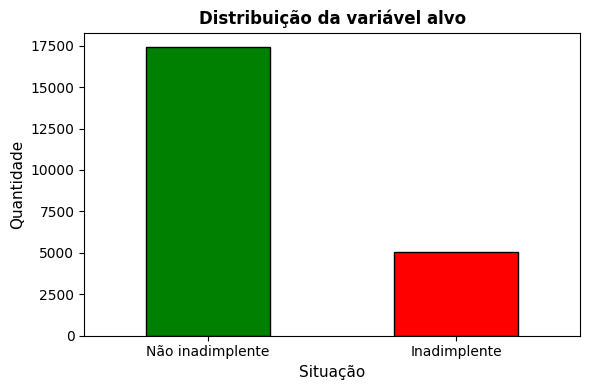

In [18]:
target_counts = df['default_payment_next_month'].value_counts()

plt.figure(figsize=(6,4))
target_counts.plot(kind='bar', color=['green', 'red'], edgecolor='black')

plt.title("Distribuição da variável alvo", fontsize=12, weight='bold')
plt.xlabel("Situação", fontsize=11)
plt.ylabel("Quantidade", fontsize=11)
plt.xticks(ticks=[0,1], labels=["Não inadimplente", "Inadimplente"], rotation=0)

plt.tight_layout()
plt.show()

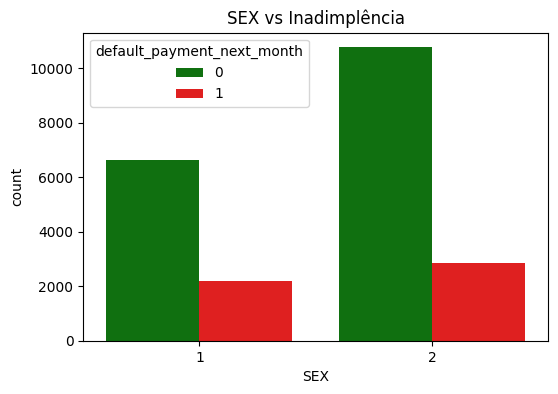

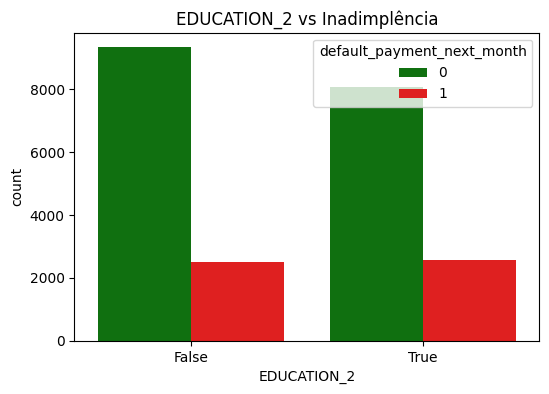

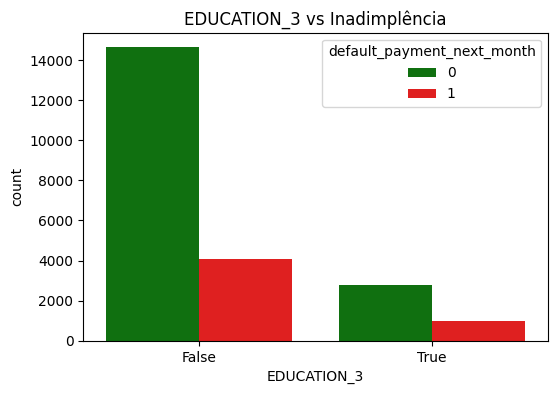

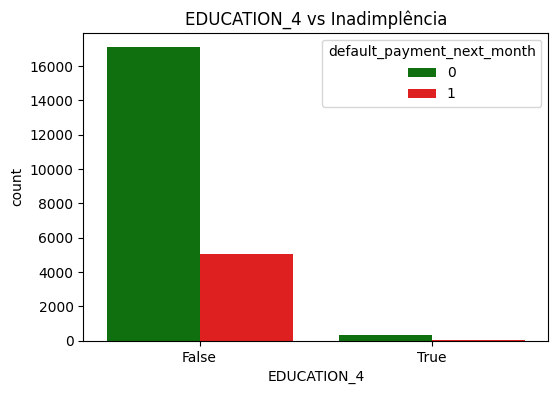

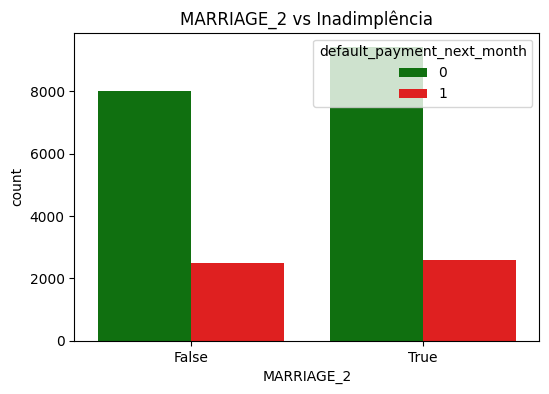

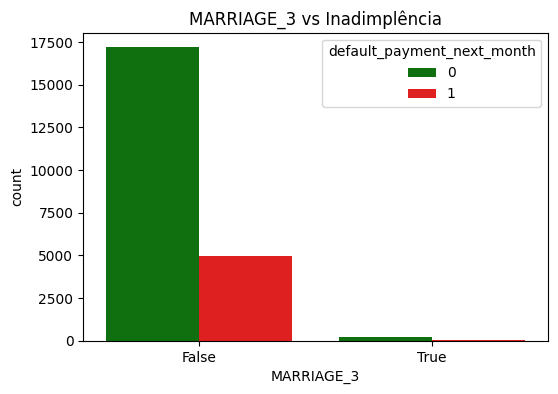

In [19]:
cat_cols = [col for col in df.columns if 'SEX' in col or 'EDUCATION' in col or 'MARRIAGE' in col]

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='default_payment_next_month', data=df, palette=['green','red'])
    plt.title(f"{col} vs Inadimplência")
    plt.show()


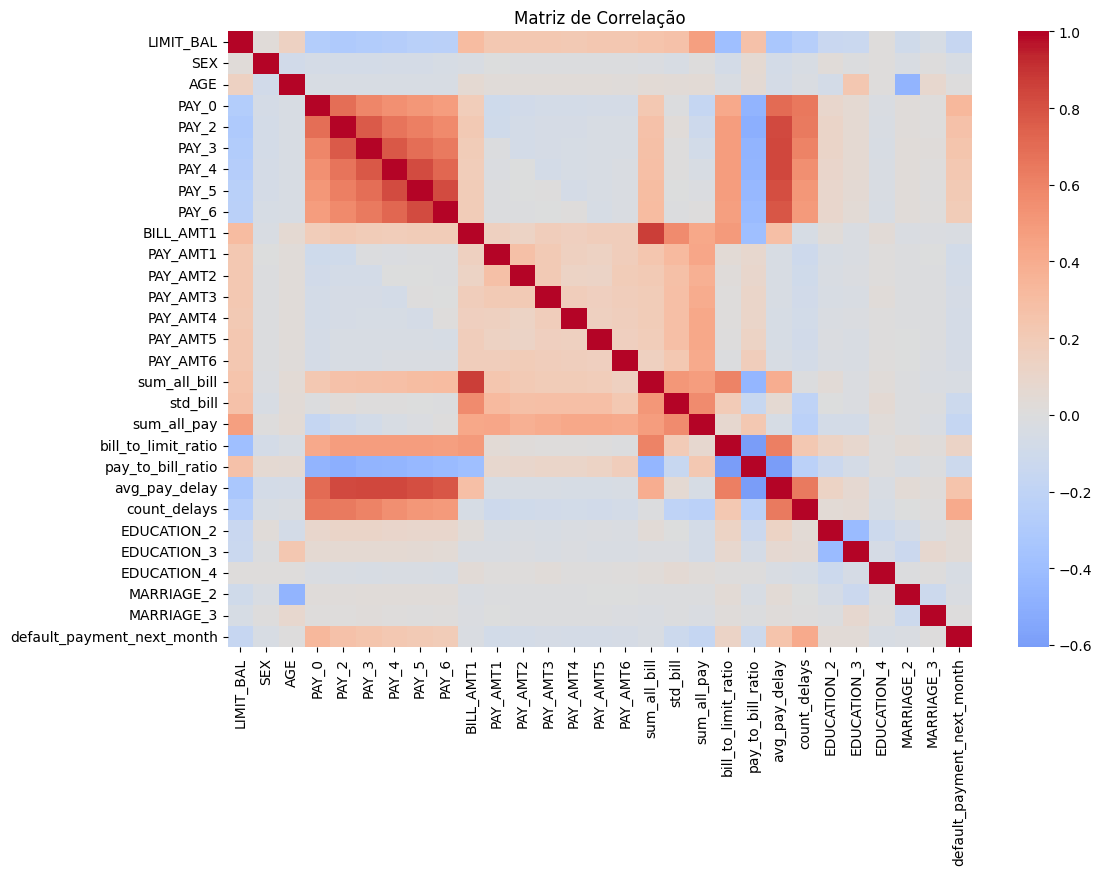

default_payment_next_month    1.000000
count_delays                  0.408551
PAY_0                         0.333803
PAY_2                         0.270574
avg_pay_delay                 0.250641
PAY_3                         0.240795
PAY_4                         0.219212
PAY_5                         0.206611
PAY_6                         0.191773
bill_to_limit_ratio           0.121253
EDUCATION_3                   0.036766
Name: default_payment_next_month, dtype: float64


In [20]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title("Matriz de Correlação")
plt.show()

corr_target = corr['default_payment_next_month'].sort_values(ascending=False)
print(corr_target.head(11))
